In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('./Iris.csv')

In [ ]:
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(105, 4)
(105,)


In [ ]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()

In [ ]:
rfc.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
rfc_predict = rfc.predict(X_test)
print(accuracy_score(y_test, rfc_predict))
print(confusion_matrix(y_test, rfc_predict))

0.9555555555555556
[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


In [ ]:
dtc_predict = dtc.predict(X_test)
print(accuracy_score(y_test, dtc_predict))
print(confusion_matrix(y_test, dtc_predict))

0.9555555555555556
[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


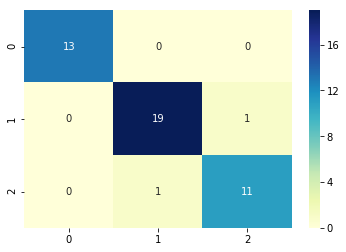

In [ ]:
sns.heatmap(confusion_matrix(y_test, rfc_predict), cmap="YlGnBu", annot=True, fmt="d");

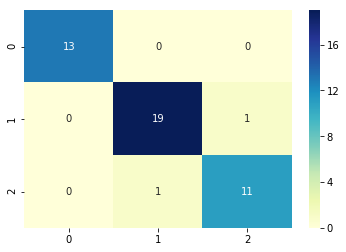

In [ ]:
sns.heatmap(confusion_matrix(y_test, dtc_predict), cmap="YlGnBu", annot=True, fmt="d");

In [ ]:
print(classification_report(y_test, rfc_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      0.92      0.92        12

      micro avg       0.96      0.96      0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



[0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556]


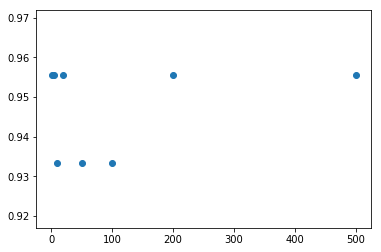

In [ ]:
n = [1 ,5 ,10, 20, 50, 100, 200, 500]

result = []

for i in n:
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    result.append(accuracy_score(y_test, predictions))    
plt.scatter(n, result)
print(result)

[0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556]


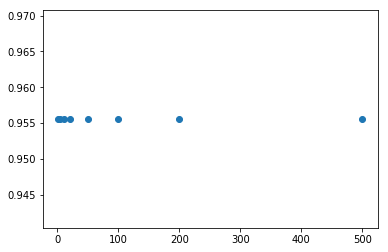

In [ ]:
n = [1 ,5 ,10, 20, 50, 100, 200, 500]

result = []

for i in n:
    dlf = DecisionTreeClassifier()
    dlf.fit(X_train, y_train)
    predictions = dlf.predict(X_test)
    result.append(accuracy_score(y_test, predictions))    
plt.scatter(n, result)
print(result)